In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from functools import reduce

## DATA PROCESSING

In [3]:
OUTPUT_PATH = './Data/output/'

### 1. HIGHSCHOOL

In [19]:
raw_hs_df = pd.read_csv(OUTPUT_PATH + 'public_secondary_enrollment2015_Clean.csv')
raw_len = len(raw_hs_df)
raw_hs_df = raw_hs_df.dropna()
print('Dropped rows:', raw_len - len(raw_hs_df))
print('Final data length:', len(raw_hs_df))

Dropped rows: 3
Final data length: 301


In [20]:
raw_hs_df.head()

,school_id,female_first year,female_fourth year,female_second year,female_third year,male_first year,male_fourth year,male_second year,male_third year,SCH_NAME,PSGC_BRGY
0,304926,39,31,30,37,44,14,20,26,Atong-Atong NHS,PH150703001
1,304927,36,21,41,20,27,13,23,22,Atong-Atong NHS - Tairan Annex,PH150703016
2,304933,10,7,14,8,13,8,11,9,Bubuan NHS,PH150713003
3,304934,33,16,41,21,24,15,21,23,Bubuan NHS-Saluping Annex,PH150713008
4,304935,39,29,35,41,47,25,36,37,Colony NHS,PH150702020


In [21]:
raw_hs_df['total_enrollees_hs'] = raw_hs_df.iloc[:, 1:9].sum(axis=1)

school_count_hs = raw_hs_df['PSGC_BRGY'].to_frame()

school_count_hs['school_count_hs'] = school_count_hs.groupby('PSGC_BRGY')['PSGC_BRGY'].transform('count')
school_count_hs.head()

,PSGC_BRGY,school_count_hs
0,PH150703001,1
1,PH150703016,1
2,PH150713003,1
3,PH150713008,1
4,PH150702020,1


### 2. SGD

In [22]:
raw_sgd_df = pd.read_csv(OUTPUT_PATH + 'Population_Schools_SDGs_Clean.csv', index_col=0)
raw_sgd_df = raw_sgd_df.dropna()
raw_sgd_df.head()

,PSGC_BRGY,both_age_0_to_4,male_age_0_to_4,female_age_0_to_4,both_age_5_to_9,male_age_5_to_9,female_age_5_to_9,both_age_10_to_14,male_age_10_to_14,female_age_10_to_14,...,SGD_Type_Worker_Pro,SGD_Type_Worker_Tec,SGD_Type_Worker_Cle,SGD_Type_Worker_Ser,SGD_Type_Worker_Ski,SGD_Type_Worker_Cra,SGD_Type_Worker_Pla,SGD_Type_Worker_Ele,SGD_Type_Worker_Arm,SGD_less_than_54_sqft
0,PH150702001,187.0,117.0,70.0,79.0,35.0,44.0,73.0,42.0,31.0,...,0.042654,0.014218,0.085308,0.208531,0.507109,0.033175,0.014218,0.052133,0.023697,0.275449
1,PH150702002,459.0,232.0,227.0,161.0,77.0,84.0,133.0,69.0,64.0,...,0.047619,0.002976,0.011905,0.047619,0.529762,0.053571,0.119048,0.113095,0.000000,0.287554
3,PH150702005,583.0,332.0,251.0,305.0,159.0,146.0,269.0,155.0,114.0,...,0.051637,0.021411,0.040302,0.070529,0.488665,0.032746,0.059194,0.164987,0.011335,0.002092
4,PH150702006,727.0,302.0,425.0,354.0,201.0,153.0,398.0,217.0,181.0,...,0.016966,0.002994,0.023952,0.106786,0.525948,0.019960,0.048902,0.171657,0.004990,0.061657
5,PH150702007,591.0,308.0,283.0,236.0,114.0,122.0,220.0,121.0,99.0,...,0.026316,0.011696,0.023392,0.084795,0.494152,0.081871,0.125731,0.096491,0.010234,0.391509


In [23]:
raw_sgd_df['SCH_HS'] = raw_sgd_df['SCH_CAT_JHS'] + raw_sgd_df['SCH_CAT_SHS']
sgd_schools = raw_sgd_df[['PSGC_BRGY', 'SCH_HS']]
sgd_schools.head()

,PSGC_BRGY,SCH_HS
0,PH150702001,0.0
1,PH150702002,0.0
3,PH150702005,0.0
4,PH150702006,0.0
5,PH150702007,0.0


In [24]:
school_count = school_count_hs.merge(sgd_schools, on='PSGC_BRGY')
school_count['common'] = np.where((school_count['school_count_hs']== school_count['SCH_HS']), True, False)
school_count['common'].value_counts()

True    262
Name: common, dtype: int64

In [25]:
final_brgy_list = school_count[school_count['common'] == True]
final_brgy_list = final_brgy_list.drop_duplicates()
final_brgy_list[final_brgy_list['school_count_hs'] ==1]

,PSGC_BRGY,school_count_hs,SCH_HS,common
0,PH150703001,1,1.0,True
1,PH150703016,1,1.0,True
2,PH150713003,1,1.0,True
3,PH150713008,1,1.0,True
4,PH150702020,1,1.0,True
...,...,...,...,...
257,PH153809007,1,1.0,True
258,PH153815009,1,1.0,True
259,PH153818001,1,1.0,True
260,PH153824009,1,1.0,True


Get only Barangays with same number of school in Population data and in School enrollment

In [26]:
cond = raw_hs_df['PSGC_BRGY'].isin(final_brgy_list['PSGC_BRGY']) 
hs_df = raw_hs_df[cond]
hs_df = hs_df[['PSGC_BRGY', 'total_enrollees_hs']]
len(hs_df)

262

In [27]:
cond = raw_sgd_df['PSGC_BRGY'].isin(final_brgy_list['PSGC_BRGY']) 
sgd_df = raw_sgd_df[cond]
len(sgd_df)

256

In [28]:
enrollment_df_hs = hs_df.groupby('PSGC_BRGY', as_index=False)['total_enrollees_hs'].sum()
dataframes = [enrollment_df_hs,sgd_df]
dataset = reduce(lambda  left,right: pd.merge(left,right,on=['PSGC_BRGY'],how='left'), dataframes)
dataset.head()

,PSGC_BRGY,total_enrollees_hs,both_age_0_to_4,male_age_0_to_4,female_age_0_to_4,both_age_5_to_9,male_age_5_to_9,female_age_5_to_9,both_age_10_to_14,male_age_10_to_14,...,SGD_Type_Worker_Tec,SGD_Type_Worker_Cle,SGD_Type_Worker_Ser,SGD_Type_Worker_Ski,SGD_Type_Worker_Cra,SGD_Type_Worker_Pla,SGD_Type_Worker_Ele,SGD_Type_Worker_Arm,SGD_less_than_54_sqft,SCH_HS
0,PH150702020,289,803.0,453.0,350.0,332.0,153.0,179.0,350.0,172.0,...,0.020134,0.029083,0.128635,0.317673,0.109620,0.091723,0.142058,0.055928,0.024213,1.0
1,PH150702028,2262,619.0,286.0,333.0,311.0,168.0,143.0,294.0,136.0,...,0.022280,0.035387,0.124509,0.287025,0.052425,0.125819,0.225426,0.014417,0.149220,1.0
2,PH150702032,292,244.0,139.0,105.0,123.0,66.0,57.0,95.0,47.0,...,0.030769,0.051282,0.146154,0.371795,0.048718,0.074359,0.105128,0.012821,0.065728,1.0
3,PH150702039,611,582.0,269.0,313.0,218.0,103.0,115.0,204.0,101.0,...,0.004283,0.002141,0.192719,0.689507,0.057816,0.014989,0.012848,0.000000,0.000000,1.0
4,PH150702050,274,351.0,199.0,152.0,190.0,101.0,89.0,176.0,93.0,...,0.007366,0.012891,0.058932,0.723757,0.011050,0.025783,0.073665,0.014733,0.035294,1.0


In [30]:
dataset['ratio_hs'] = dataset['total_enrollees_hs'] / dataset['both_age_13_to_16']
print('Min elem:', min(dataset['ratio_hs']))
print('Max elem:', max(dataset['ratio_hs']))

Min elem: 0.04698483166851646
Max elem: 24.366666666666667


### 3. CORRELATION HEATMAP

In [32]:
cluster_df = dataset.iloc[:,79:]
cluster_df['SCH_HS_PRIVATE'] = dataset['SCH_CAT_PJHS'] + dataset['SCH_CAT_PSHS']
cluster_df.head()

,SDG_Households_Electricity_Light_Pct,SDG_Households_Kerosene_Gass_Light_Pct,SDG_Households_Drinking_Owned_Faucet_Pct,SDG_Households_Drinking_Shared_Faucet_Pct,SGD_Households_Construction_Material_Concrete_Pct,SGD_Building_Tenure_Type_Owned_Pct,SGD_Type_Building_Single_Pct,SGD_Type_Worker_Man,SGD_Type_Worker_Pro,SGD_Type_Worker_Tec,...,SGD_Type_Worker_Ser,SGD_Type_Worker_Ski,SGD_Type_Worker_Cra,SGD_Type_Worker_Pla,SGD_Type_Worker_Ele,SGD_Type_Worker_Arm,SGD_less_than_54_sqft,SCH_HS,ratio_hs,SCH_HS_PRIVATE
0,0.825688,0.169725,0.125382,0.096330,0.208589,0.371560,0.980061,0.060403,0.041387,0.020134,...,0.128635,0.317673,0.109620,0.091723,0.142058,0.055928,0.024213,1.0,1.062500,0.0
1,0.907115,0.092885,0.527668,0.359684,0.215415,0.723320,0.960474,0.047182,0.065531,0.022280,...,0.124509,0.287025,0.052425,0.125819,0.225426,0.014417,0.149220,1.0,10.423963,0.0
2,0.853556,0.146444,0.443515,0.397490,0.252252,0.769874,0.972973,0.025641,0.133333,0.030769,...,0.146154,0.371795,0.048718,0.074359,0.105128,0.012821,0.065728,1.0,3.893333,0.0
3,0.766154,0.233846,0.021538,0.000000,0.184615,0.547692,0.969231,0.019272,0.006424,0.004283,...,0.192719,0.689507,0.057816,0.014989,0.012848,0.000000,0.000000,1.0,3.795031,0.0
4,0.812821,0.184615,0.007692,0.017949,0.131443,0.751282,0.987113,0.033149,0.038674,0.007366,...,0.058932,0.723757,0.011050,0.025783,0.073665,0.014733,0.035294,1.0,1.779221,0.0


Text(0.5, 1.0, 'Correlation Heatmap')

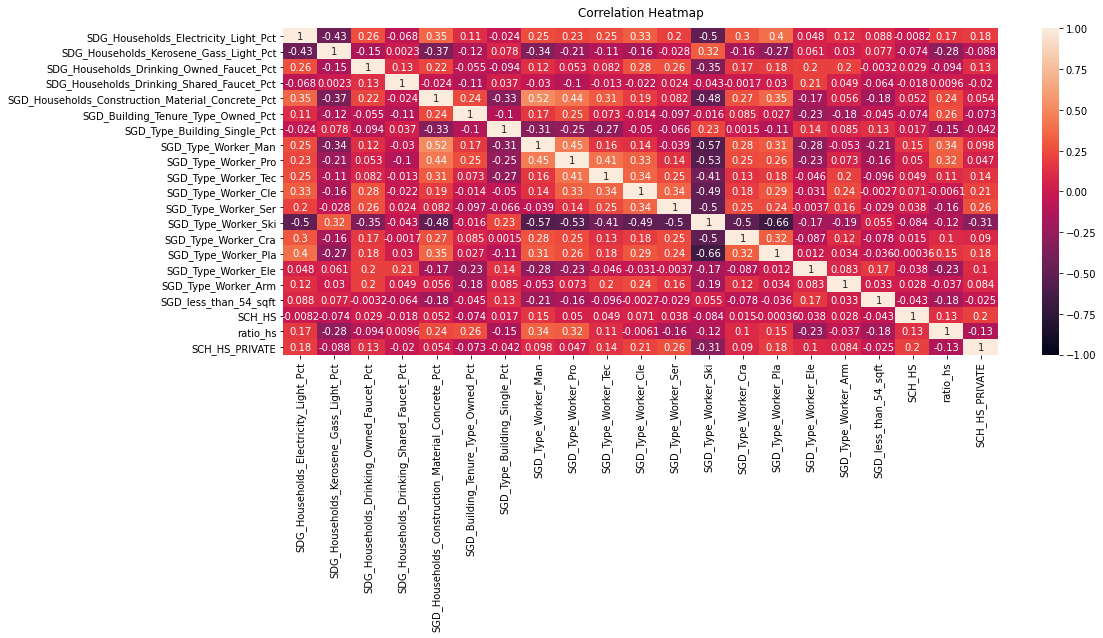

In [33]:
heatmap_df = dataset.drop(['PSGC_BRGY'], axis=1)
plt.figure(figsize=(16,6))

heatmap = sns.heatmap(cluster_df.corr(), vmin=-1,vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [34]:
kmeans_data = cluster_df.copy()
# kmeans_data = kmeans_data.drop(['ratio_elem'], axis=1)

Since all are in percentage, no need to scale

### 4. PCA

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=len(kmeans_data.columns))
X_principal = pca.fit_transform(kmeans_data)

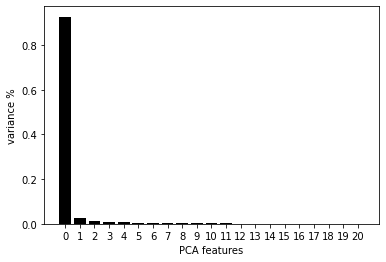

In [37]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

In [38]:
PCA_THRESHOLD = 0.7

In [39]:
explained_ratio = list(pca.explained_variance_ratio_)
feature_list = []
for i in range(pca.n_components_):
    if explained_ratio[i] > PCA_THRESHOLD:
        feature_list.append(i)

In [40]:
PCA_components = pd.DataFrame(X_principal)
PCA_components = PCA_components[feature_list]
PCA_components.head()

,0
0,-1.787076
1,7.571815
2,1.050321
3,0.940944
4,-1.065731


## CLUSTERING

In [41]:
from sklearn.cluster import KMeans

In [42]:
sse = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(PCA_components)
    sse.append(kmeans.inertia_)

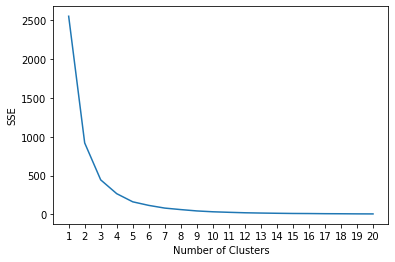

In [43]:
plt.plot(range(1,21), sse)
plt.xticks(range(1,21))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [44]:
N_CLUSTERS = 4

In [45]:
kmeans = KMeans(n_clusters=N_CLUSTERS)
predicted = kmeans.fit_predict(PCA_components)

In [46]:
kmeans_data['PSGC_BRGY'] = dataset['PSGC_BRGY']
# kmeans_data['SCH_ELEM'] = dataset['SCH_ELEM']
# kmeans_data['ratio'] = dataset['ratio_elem']
kmeans_data['cluster'] = predicted

In [47]:
eval_df = kmeans_data.copy()
eval_df = eval_df.drop(['PSGC_BRGY'], axis=1)
eval_df = eval_df.groupby('cluster', as_index=False).mean()
# eval_df = eval_df.drop(['cluster'], axis=1)
eval_df

,cluster,SDG_Households_Electricity_Light_Pct,SDG_Households_Kerosene_Gass_Light_Pct,SDG_Households_Drinking_Owned_Faucet_Pct,SDG_Households_Drinking_Shared_Faucet_Pct,SGD_Households_Construction_Material_Concrete_Pct,SGD_Building_Tenure_Type_Owned_Pct,SGD_Type_Building_Single_Pct,SGD_Type_Worker_Man,SGD_Type_Worker_Pro,...,SGD_Type_Worker_Ser,SGD_Type_Worker_Ski,SGD_Type_Worker_Cra,SGD_Type_Worker_Pla,SGD_Type_Worker_Ele,SGD_Type_Worker_Arm,SGD_less_than_54_sqft,SCH_HS,ratio_hs,SCH_HS_PRIVATE
0,0,0.486820,0.190858,0.099111,0.123995,0.128037,0.570015,0.948833,0.073725,0.035746,...,0.093029,0.535324,0.026027,0.069834,0.114376,0.003637,0.100150,1.010989,1.325435,0.148352
1,1,0.803527,0.007467,0.045794,0.185146,0.315759,0.875254,0.878140,0.167892,0.074365,...,0.056212,0.432225,0.039747,0.105826,0.073176,0.001947,0.031477,1.062500,10.623785,0.000000
2,2,0.458089,0.067919,0.097216,0.158632,0.232610,0.721795,0.895398,0.151085,0.062388,...,0.080996,0.481813,0.030075,0.076479,0.067821,0.004217,0.030609,1.053571,4.971424,0.000000
3,3,0.996241,0.000000,0.007519,0.000000,0.210784,0.826877,0.990196,0.152424,0.116643,...,0.071096,0.428555,0.056364,0.097599,0.050909,0.001818,0.000000,1.000000,20.710606,0.000000


In [48]:
df_pivot = pd.pivot_table(
    eval_df,
    columns='cluster'
)

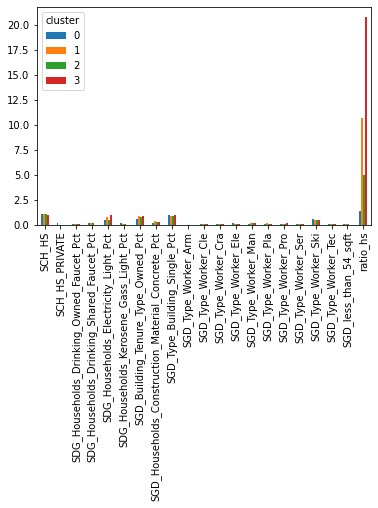

In [49]:

df_pivot.plot(kind="bar")

plt.show()

In [51]:
kmeans_data.to_csv(OUTPUT_PATH + 'cluster_hs.csv', index=False)